In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import joblib
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

# Load the Nigeria cities weather data
weather_df = pd.read_csv('/content/drive/MyDrive/Dataset/nigeria_cities_weather_data.csv')
print("\nWeather Prediction Data")
print(weather_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Weather Prediction Data
  country    city  latitude  longitude    temp  temp_min  temp_max  pressure  \
0      NG   Ankpa      7.38       7.65  311.93    311.93    311.93      1006   
1      NG  Bugana      7.87       7.51  313.10    313.10    313.10      1006   
2      NG   Adoru      7.17       7.04  311.61    311.61    311.61      1006   
3      NG   Ankpa      7.32       7.67  312.75    312.75    312.75      1006   
4      NG  Abocho      7.57       6.99  310.25    310.25    310.25      1006   

   humidity  sea_level  ...  wind_speed  wind_degree              sunrise  \
0        28       1006  ...        0.44           34  2024-02-21 05:45:30   
1        29       1006  ...        1.86           35  2024-02-21 05:46:26   
2        34       1006  ...        1.78          211  2024-02-21 05:47:47   
3        28       1006  ...        0.35           45  202

In [ ]:
# Dataset info and missing values
print("Shape:", weather_df.shape)
print("\nInfo:")
print(weather_df.info())

print("\nMissing values:")
print(weather_df.isnull().sum())

Shape: (22541, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22541 entries, 0 to 22540
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       22541 non-null  object 
 1   city          22541 non-null  object 
 2   latitude      22541 non-null  float64
 3   longitude     22541 non-null  float64
 4   temp          22541 non-null  float64
 5   temp_min      22541 non-null  float64
 6   temp_max      22541 non-null  float64
 7   pressure      22541 non-null  int64  
 8   humidity      22541 non-null  int64  
 9   sea_level     22541 non-null  int64  
 10  ground_level  22541 non-null  int64  
 11  wind_speed    22541 non-null  float64
 12  wind_degree   22541 non-null  int64  
 13  sunrise       22541 non-null  object 
 14  sunset        22541 non-null  object 
 15  timezone      22541 non-null  int64  
 16  cloud         22541 non-null  int64  
 17  description   22541 non-null  object 
 18  

In [ ]:
# Check distribution of weather labels
print("Label distribution (Description):")
print(weather_df['description'].value_counts())


Label distribution (Description):
description
Clouds    17287
Clear      3127
Rain       2127
Name: count, dtype: int64


In [ ]:
# Map weather descriptions to numeric labels
label_map = {'Clear': 0, 'Clouds': 1, 'Rain': 2}
weather_df['weather_label'] = weather_df['description'].map(label_map)

# Check if it worked
weather_df[['description', 'weather_label']].head()


,description,weather_label
0,Clouds,1
1,Clouds,1
2,Clouds,1
3,Clouds,1
4,Clouds,1


In [ ]:
print("Unique encoded labels:")
print(weather_df['weather_label'].unique())


Unique encoded labels:
[1 2 0]


In [ ]:
# Convert 'date' column to datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Extract useful parts of the date
weather_df['day'] = weather_df['date'].dt.day
weather_df['month'] = weather_df['date'].dt.month
weather_df['year'] = weather_df['date'].dt.year

In [ ]:
# Select your features (make sure these exist in your dataset)
X = weather_df[['temp', 'humidity', 'month', 'day']]  # you can add more if available
y = weather_df['weather_label']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 18032
Testing samples: 4509


In [ ]:
# Create the model
weather_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
weather_model.fit(X_train, y_train)

print("✅ Weather model training complete.")

✅ Weather model training complete.


In [ ]:
# Use the model to make predictions on the test set
y_pred = weather_model.predict(X_test)


In [ ]:
# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🔍 Accuracy: {round(accuracy * 100, 2)}%")

# Classification report for precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Clear', 'Clouds', 'Rain']))

🔍 Accuracy: 91.31%

Classification Report:
              precision    recall  f1-score   support

       Clear       0.85      0.85      0.85       641
      Clouds       0.95      0.94      0.94      3446
        Rain       0.75      0.80      0.77       422

    accuracy                           0.91      4509
   macro avg       0.85      0.86      0.85      4509
weighted avg       0.91      0.91      0.91      4509



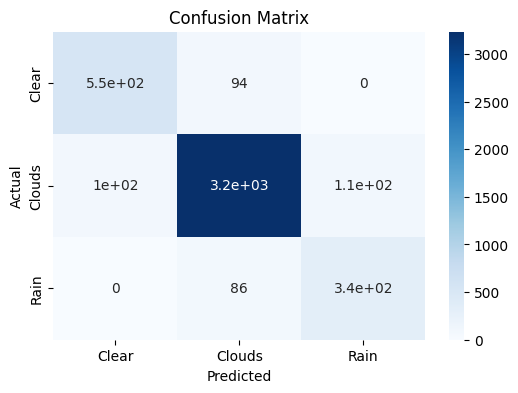

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Clear', 'Clouds', 'Rain'], yticklabels=['Clear', 'Clouds', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
joblib.dump(weather_model, 'weather_prediction_model.pkl')
print("💾 Model saved as 'weather_prediction_model.pkl'")


💾 Model saved as 'weather_prediction_model.pkl'


In [ ]:
files.download('weather_prediction_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>